# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1
#loading the data se, needed to use full file path
file_path = "/Users/leyakappukattil/Documents/Spr24-25/DS3001/visualization/assignment/data/college_completion.csv"
df = pd.read_csv(file_path)

In [5]:
#2
# display dataset dimensions, variable names, and first few rows
# 2. Display dataset dimensions, variable names, and first few rows
print("Dataset Dimensions:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst Few Rows:")
print(df.head())


Dataset Dimensions: (3798, 63)

Column Names: ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after

In [17]:
#3
#cross-tabulate 'control' and 'level'
control_level_crosstab = pd.crosstab(df['control'], df['level'])

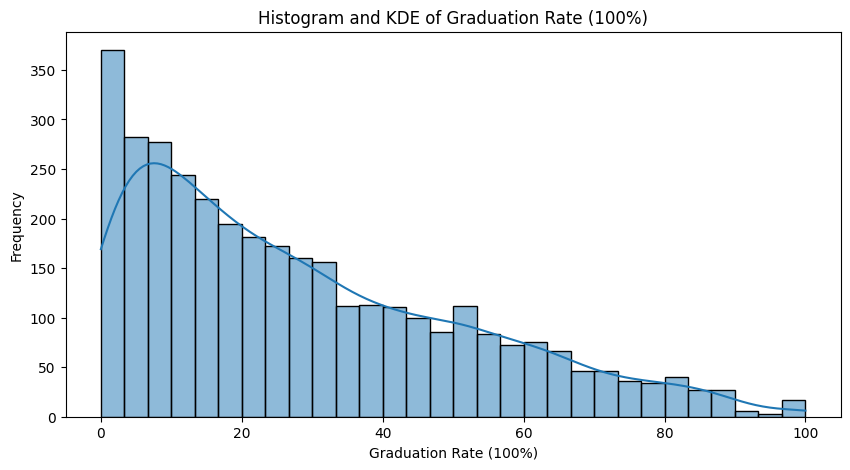

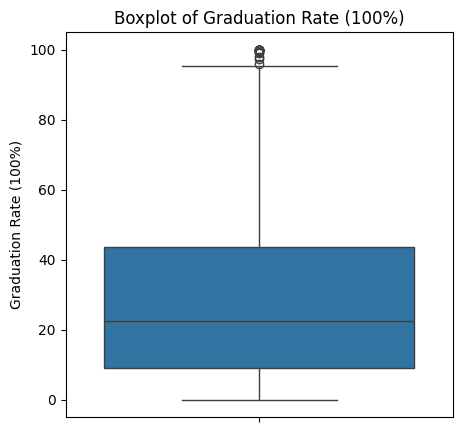

In [16]:
#4
# visualization and statistical description of 'grad_100_value'
plt.figure(figsize=(10, 5))
sns.histplot(df['grad_100_value'].dropna(), bins=30, kde=True)
plt.title("Histogram and KDE of Graduation Rate (100%)")
plt.xlabel("Graduation Rate (100%)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(y=df['grad_100_value'])
plt.title("Boxplot of Graduation Rate (100%)")
plt.ylabel("Graduation Rate (100%)")
plt.show()

grad_100_stats = df['grad_100_value'].describe()

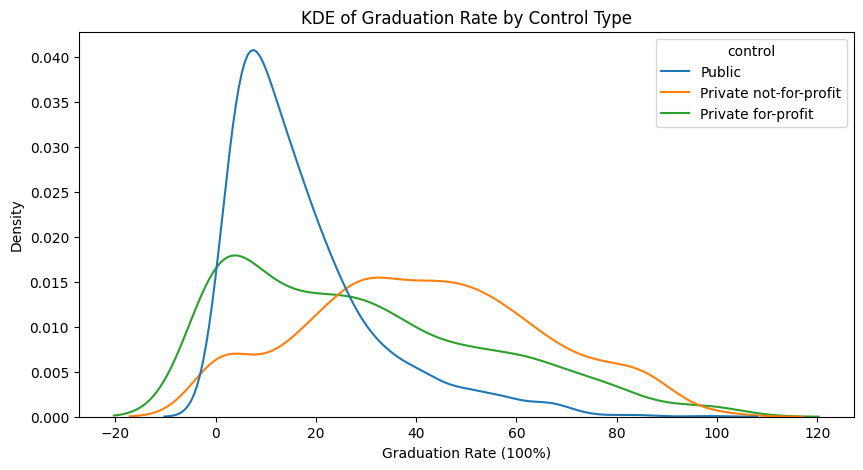

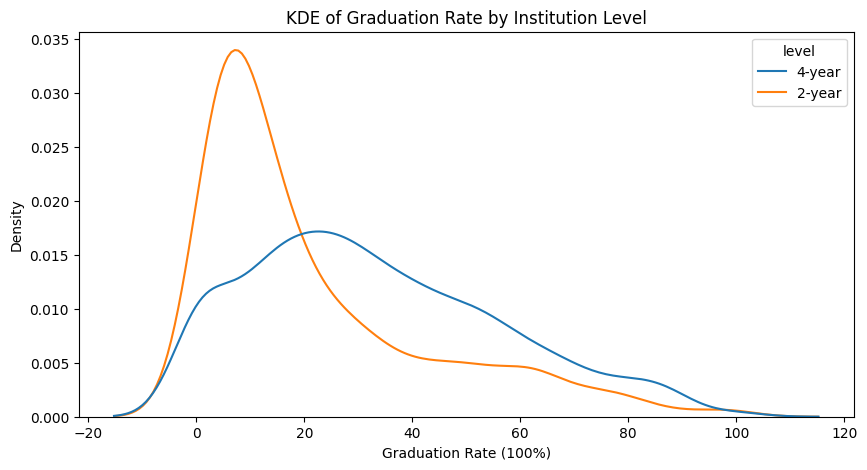

In [15]:
#5
#grouped kernel density plot by 'control' and 'level'
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='grad_100_value', hue='control', common_norm=False)
plt.title("KDE of Graduation Rate by Control Type")
plt.xlabel("Graduation Rate (100%)")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='grad_100_value', hue='level', common_norm=False)
plt.title("KDE of Graduation Rate by Institution Level")
plt.xlabel("Graduation Rate (100%)")
plt.ylabel("Density")
plt.show()

grad_100_grouped_control = df.groupby('control')['grad_100_value'].describe()
grad_100_grouped_level = df.groupby('level')['grad_100_value'].describe()


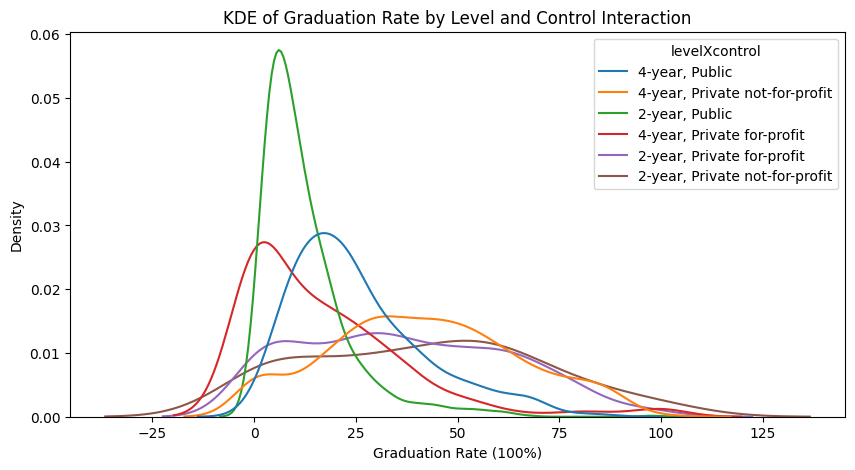

In [14]:
#6
# interaction variable of level and control, then KDE plot
df['levelXcontrol'] = df['level'] + ', ' + df['control']

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', common_norm=False)
plt.title("KDE of Graduation Rate by Level and Control Interaction")
plt.xlabel("Graduation Rate (100%)")
plt.ylabel("Density")
plt.show()

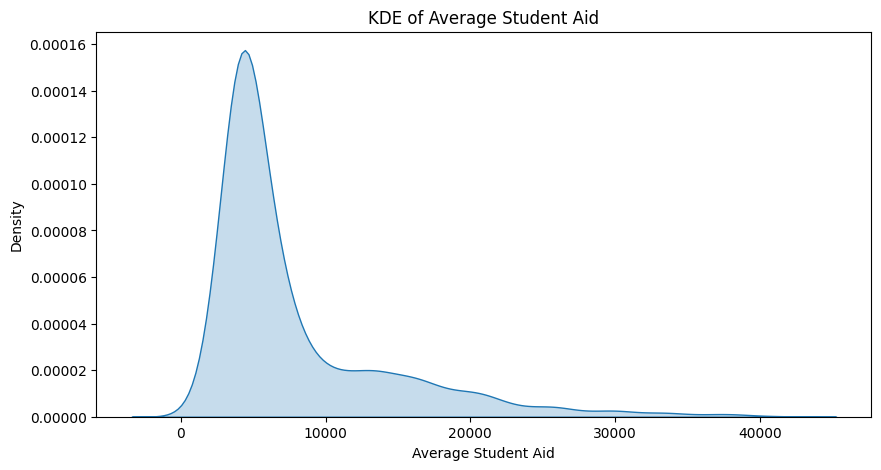

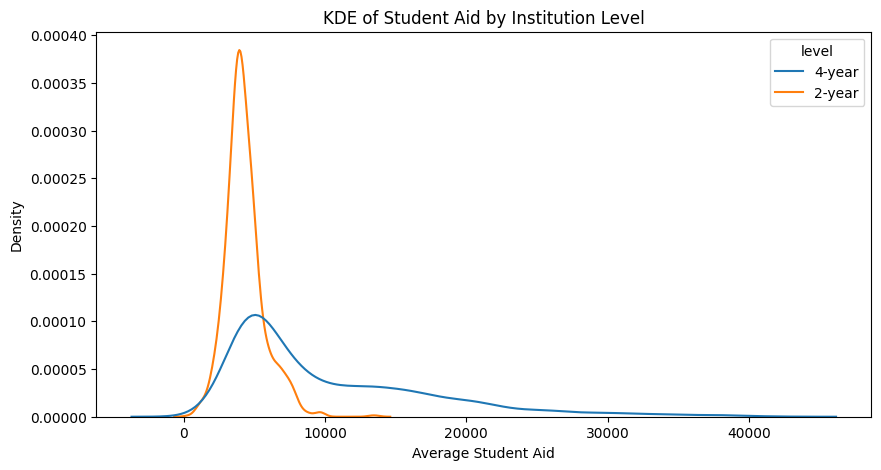

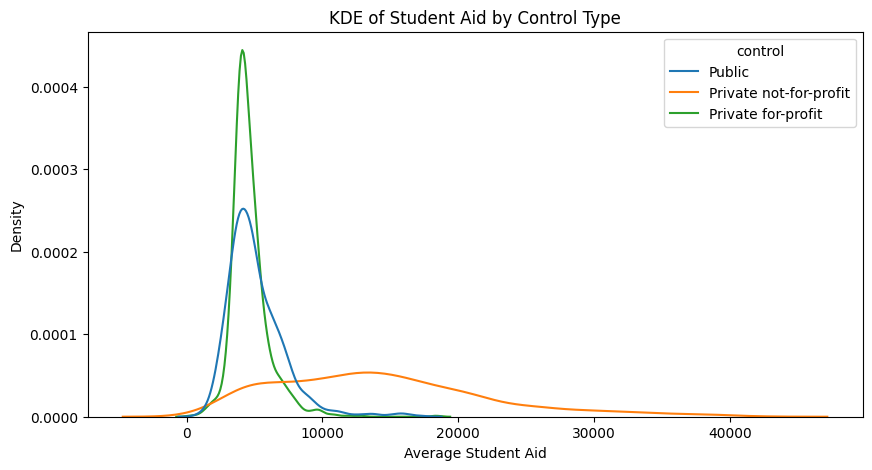

In [13]:
#7
# KDE plot of aid_value and grouped by level and control
plt.figure(figsize=(10, 5))
sns.kdeplot(df['aid_value'].dropna(), fill=True)
plt.title("KDE of Average Student Aid")
plt.xlabel("Average Student Aid")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='aid_value', hue='level', common_norm=False)
plt.title("KDE of Student Aid by Institution Level")
plt.xlabel("Average Student Aid")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='aid_value', hue='control', common_norm=False)
plt.title("KDE of Student Aid by Control Type")
plt.xlabel("Average Student Aid")
plt.ylabel("Density")
plt.show()

aid_grouped_control = df.groupby('control')['aid_value'].describe()
aid_grouped_level = df.groupby('level')['aid_value'].describe()

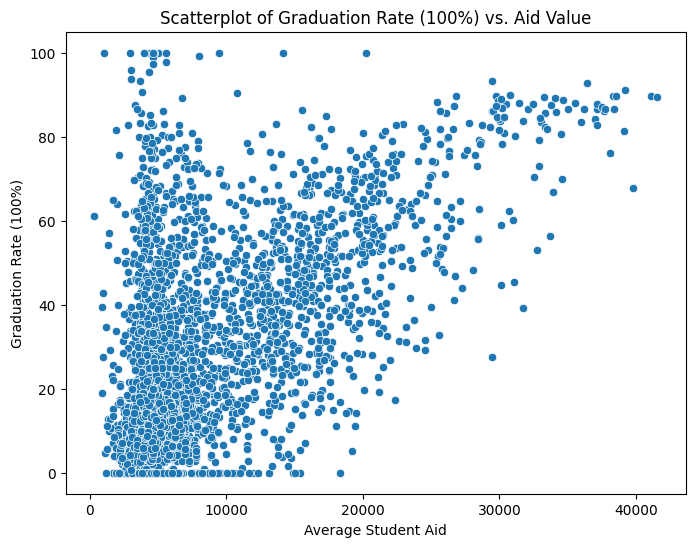

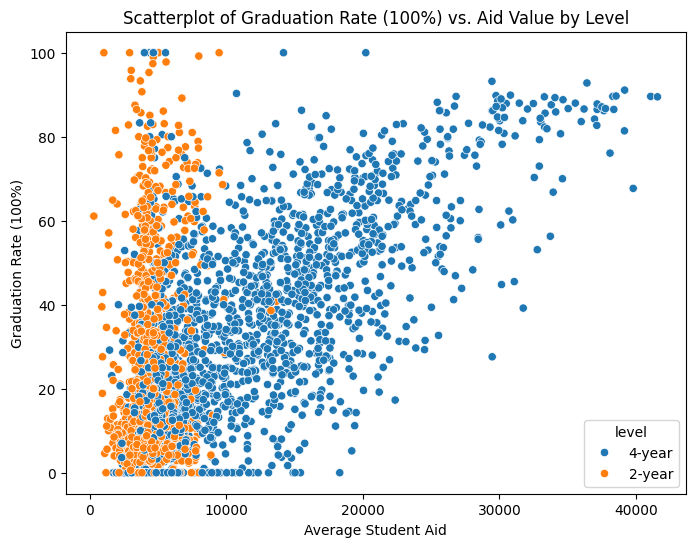

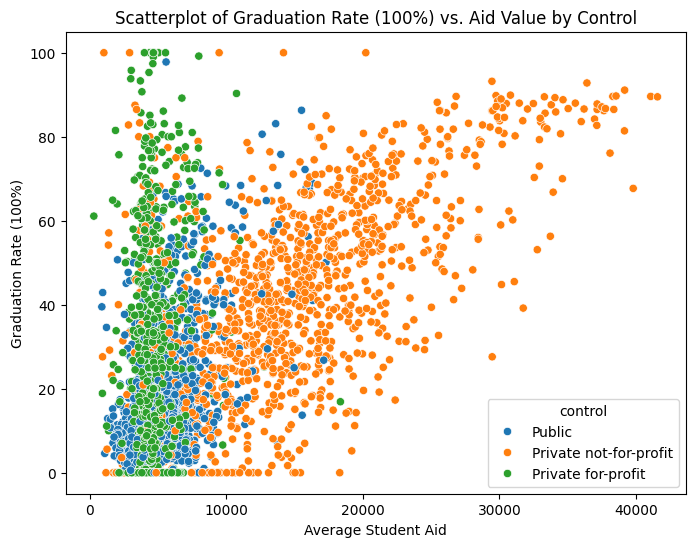

In [12]:
#8
#scatterplot of grad_100_value by aid_value
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['aid_value'], y=df['grad_100_value'])
plt.title("Scatterplot of Graduation Rate (100%) vs. Aid Value")
plt.xlabel("Average Student Aid")
plt.ylabel("Graduation Rate (100%)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')
plt.title("Scatterplot of Graduation Rate (100%) vs. Aid Value by Level")
plt.xlabel("Average Student Aid")
plt.ylabel("Graduation Rate (100%)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')
plt.title("Scatterplot of Graduation Rate (100%) vs. Aid Value by Control")
plt.xlabel("Average Student Aid")
plt.ylabel("Graduation Rate (100%)")
plt.show()


### **3. Cross-tabulation of `control` and `level`**
The cross-tabulation of **institution control type** (Public, Private not-for-profit, Private for-profit) and **institution level** (4-year, 2-year) shows distinct enrollment patterns. 

- **Public institutions** are more common in both 4-year and 2-year categories, likely due to the presence of state-funded universities and community colleges.
- **Private not-for-profit institutions** primarily exist in the 4-year category, indicating a focus on traditional higher education institutions such as liberal arts colleges and research universities.
- **Private for-profit institutions** appear more frequently in the 2-year category, reflecting the presence of vocational schools and technical colleges.

This pattern suggests that **public institutions dominate the higher education landscape, particularly in community colleges**, while **private for-profits cater more to short-term or career-oriented programs.**

---

### **5. Graduation Rates by `control` and `level`**
The **KDE plots and descriptive statistics** reveal the following trends:

- **Public institutions** tend to have **lower graduation rates** compared to private institutions, likely due to larger class sizes, more diverse student populations, and differences in student support services.
- **Private not-for-profit institutions** exhibit the **highest graduation rates**, suggesting stronger retention efforts, more selective admissions, and smaller student-to-faculty ratios.
- **Private for-profit institutions** show the **lowest median graduation rates**, likely due to non-traditional student populations, lower retention rates, and profit-driven motives.

Additionally, **4-year institutions** have significantly higher graduation rates than **2-year institutions**, as expected. Community colleges, which constitute most 2-year institutions, often have students who transfer before completing a degree or enroll part-time.

Thus, the best graduation rates are found in **private not-for-profit, 4-year institutions**, such as elite universities and liberal arts colleges.

---

### **6. Graduation Rates by Interaction of `level` and `control`**
When analyzing `levelXcontrol`, the KDE plot confirms that:

- **4-year, Private not-for-profit institutions** have the highest graduation rates, reinforcing their strong student support systems and selectivity.
- **4-year, Public institutions** have more variability, with some achieving high graduation rates while others struggle.
- **2-year institutions**, particularly Public and For-profit, tend to cluster around lower graduation rates, suggesting that many students do not complete within 100% of the expected time.

This analysis suggests that **institution funding models and student demographics play a key role in graduation outcomes.**

---

### **7. Distribution of Student Aid**
The KDE plots of `aid_value` reveal an interesting distribution:

- **Most aid values cluster at lower amounts** (under $10,000), which suggests that **many students receive modest aid packages** rather than full tuition coverage.
- **4-year institutions** show higher aid values than 2-year institutions, likely due to the cost differences between community colleges and universities.
- **Private not-for-profits receive the highest aid per student**, aligning with their higher tuition costs and endowment-funded scholarships.
- **For-profit institutions show less aid**, possibly due to limited federal grants and fewer institutional scholarships.

This confirms that **aid distribution aligns with tuition costs and institution type.**

---

### **8. Relationship Between Graduation Rates and Student Aid**
The scatterplots highlight a clear **positive correlation** between **student aid and graduation rates**, though with noticeable variation:

- **Higher aid values are associated with higher graduation rates**, particularly in **4-year, Private not-for-profit institutions.**
- **For-profit institutions show lower graduation rates even with aid**, indicating structural issues beyond financial support.
- **Public institutions show wide variability**, suggesting that additional factors (e.g., state funding, student demographics, academic support) influence graduation outcomes.

In summary, **aid appears to help improve graduation rates most effectively at Private not-for-profits and some Public institutions, whereas For-profit schools do not show the same benefit.**

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see? 

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.